# Bank Marketing Campaign Analysis and Deposit Prediction
This project analyzes a bank marketing dataset to understand customer behavior and predict whether a client will subscribe to a term deposit. The workflow includes data cleaning, visualization, feature engineering, and building machine learning models such as Logistic Regression.

## 1-Import Required Libraries

In this section, we import the Python libraries needed for data analysis, visualization, and machine learning.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings("ignore")

## 2-Load the Dataset



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/JayasreeMeda/BankMarketingAnalysis/refs/heads/main/bank.csv"
df = pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 3-Dataset Shape

Here, we check the number of rows and columns in the dataset.


In [ ]:
df.shape

(11162, 17)

## 4-Column Names

This step shows all column names present in the dataset.


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## 5-Dataset Information

We inspect data types and non-null counts to understand the structure of the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## 6-Summary Statistics

Basic statistics are calculated for numerical columns to understand their distribution and range.


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## 7-Check for Missing Values and Duplicates

We verify whether the dataset contains missing values or duplicate rows.


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## 8-Target Variable Distribution

A bar chart is used to visualize how many customers subscribed to a deposit versus those who did not.


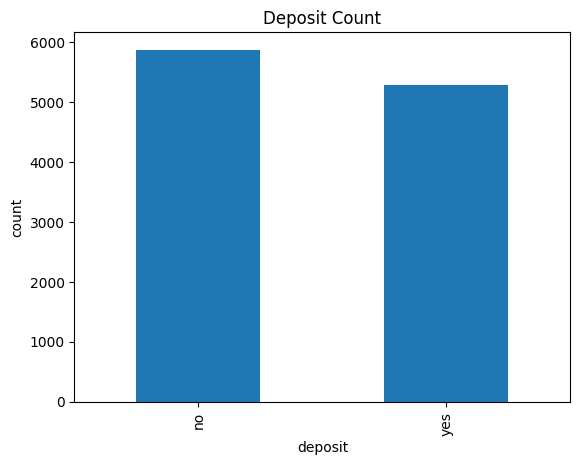

In [ ]:
df["deposit"].value_counts().plot(kind="bar")
plt.title("Deposit Count")
plt.xlabel("deposit")
plt.ylabel("count")
plt.show()

## 9-Age Distribution

A histogram is plotted to understand the age distribution of customers.


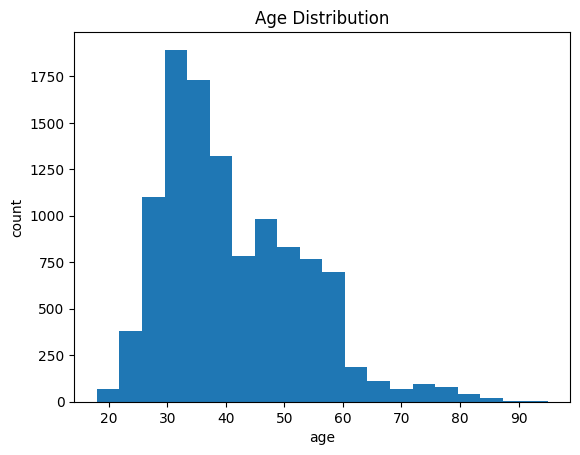

In [ ]:
df["age"].plot(kind="hist", bins=20)
plt.title("Age Distribution")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

## 10-Balance Distribution

A histogram is plotted to observe how customer balances are distributed.


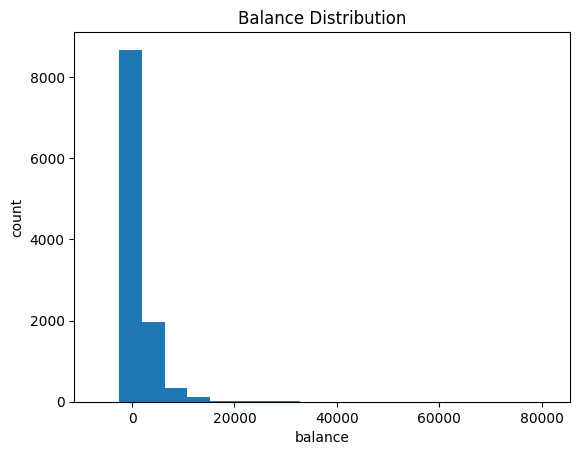

In [ ]:
df["balance"].plot(kind="hist", bins=20)
plt.title("Balance Distribution")
plt.xlabel("balance")
plt.ylabel("count")
plt.show()

## 11-Deposit Rate by Job

We analyze the percentage of customers who subscribed to a deposit across different job categories.


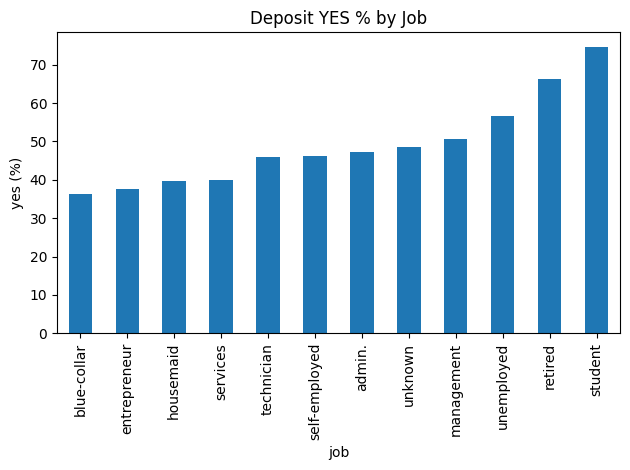

In [ ]:
job_rate = pd.crosstab(df["job"], df["deposit"], normalize="index") * 100
job_rate["yes"].sort_values().plot(kind="bar")
plt.title("Deposit YES % by Job")
plt.xlabel("job")
plt.ylabel("yes (%)")
plt.tight_layout()
plt.show()

## 12-Feature Engineering

In this step, we create simple new features:
- Whether a customer has any loan
- Whether a customer has a positive balance


In [ ]:
df["has_any_loan"] = ((df["housing"] == "yes") | (df["loan"] == "yes")).astype(int)
df["balance_positive"] = (df["balance"] > 0).astype(int)

df[["housing", "loan", "has_any_loan", "balance", "balance_positive"]].head()

,housing,loan,has_any_loan,balance,balance_positive
0,yes,no,1,2343,1
1,no,no,0,45,1
2,yes,no,1,1270,1
3,yes,no,1,2476,1
4,no,no,0,184,1


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,has_any_loan,balance_positive
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0,1


## 13-Encode Target Variable

The target variable `deposit` is converted into numerical form:
- yes → 1
- no → 0


In [ ]:
df["deposit_num"] = df["deposit"].map({"yes": 1, "no": 0})
df[["deposit", "deposit_num"]].head()

,deposit,deposit_num
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,yes,1


## 14-Split Features and Target

The dataset is divided into:
- X: input features  
- y: target variable


In [ ]:
X = df.drop(columns=["deposit", "deposit_num"])
y = df["deposit_num"]

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,has_any_loan,balance_positive,deposit_num
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1,1,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0,1,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1,1,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1,1,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0,1,1


## 15-Convert Categorical Features to Numbers

Machine learning models cannot work with text data.
In this step, categorical columns are converted into numeric columns so that the model can understand and use them.


In [ ]:
X = pd.get_dummies(X, drop_first=True)
print("Final X shape:", X.shape)

Final X shape: (11162, 44)


## 16-Feature Shape After Conversion

After converting categorical features into numeric form, we check the updated shape of the feature dataset.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (8929, 44)
Test size : (2233, 44)


## 17-Train Logistic Regression Model

A Logistic Regression model is trained to predict whether a customer will subscribe to a term deposit.


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 18-Model Prediction and Accuracy

The trained model is used to make predictions on the test dataset.
Model accuracy is calculated to measure overall performance.


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8096730855351545


## 19-Model Evaluation

The model is evaluated using a confusion matrix and a classification report.
These metrics provide insight into how well the model predicts each class.


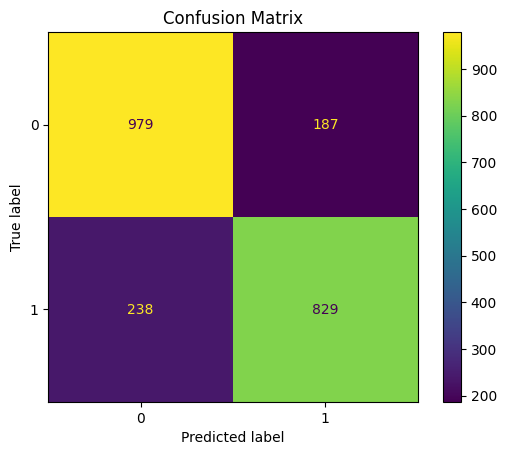

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1166
           1       0.82      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

